In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import SimulatedAnnealing_Nucleaseq_parallel as SimA
import calculate_cleavage_rate as clv
import functools
import Nucleaseq_data_processing as processing

In [3]:
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_dataOn = '../Data_Boyle/'
path_to_dataClv = '../' + '/data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,path_to_dataOn,path_to_dataClv,True)

perfectClv = np.float(len(ydata[0][0]))
perfectOn = np.float(len(ydata[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):
    if len(xdata[i])==1:
        singleClv += len(ydata[i][0])
        singleOn += len(ydata[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i][0])
        doubleOn += len(ydata[i][1])
    
chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,1/perfectOn,1/singleOn,1/doubleOn]

model = ['Clv_Saturated_general_energies_v2','general_energies_no_kPR']
Tstart = 1000
delta = 1.0
tol = 10^-5
Tfinal = 0.0
adjust_factor = 1.1
cooling_rate = 0.99
N_int = 1000
AR_low = 40.
AR_high = 60.
use_multiprocessing = True
nprocs = 2
use_relative_steps = False
objective_function = functools.partial(clv.calc_chi_squared,
                        guide_length=20,
                        model_id=model)
NMAC = False
reanneal = False
ReannealFactor = 1

upbnd = [10.0] + [10.0]*40 + [6.0] + [6.0] + [6.0]
lwrbnd = [0.0] + [-10.0]*20 + [0.0]*20 + [-1.0] + [1.0] + [3.0]
initial_guess =  [5.0] + [0.0]*20 + [5.0]*20 + [1.0] + [3.0] + [4.5]

SA = SimA.SimAnneal(model=model,
                   Tstart=Tstart,
                   delta=delta,
                   tol=tol,
                   Tfinal=Tfinal,
                    potential_threshold = np.inf,
                   adjust_factor=adjust_factor,
                   cooling_rate_high=cooling_rate,
                cooling_rate_low=cooling_rate,
                   N_int=N_int,
                    Ttransition=np.inf,
                   AR_low=AR_low,
                   AR_high=AR_high,
                   use_multiprocessing=use_multiprocessing,
                   nprocs=nprocs,
                   use_relative_steps=use_relative_steps,
                   objective_function=objective_function,
                   chi_weights=chi_weights,
                   NMAC=NMAC,
                   reanneal=reanneal)

print SA.objective_function

In [ ]:
it = 2000
T = np.logspace(-1,2,20)
Potentials = np.zeros([len(T),it/10])

for j in range(len(T)):
    X = initial_guess
    SA.potential = SimA.V(SA, xdata,ydata,yerr,X)
    for i in range(it):
        Xtrial = SimA.TakeStep(SA, X, lwrbnd, upbnd)
        Vnew = SimA.V(SA, xdata, ydata, yerr, Xtrial)
        Vold = SA.potential
        if (np.random.uniform() < np.exp(-(Vnew - Vold) / T[j])):
            X = Xtrial
            SA.accept += 1
            SA.potential = Vnew
        if i%10==0:
            Potentials[j][i/10] = SA.potential
            print 'T: ' + str(j+1) + ', it: ' + str(i/10+1)
    
Var = np.var(Potentials,1)
SH = Var/T**2
plt.semilogx(T,SH)

In [ ]:
it = 100
T = np.logspace(0,4,20)
Potentials = np.zeros([len(T),it])

for j in range(len(T)):
    X = initial_guess
    SA.potential = SimA.V(SA, xdata,ydata,yerr,X)
    for i in range(it):
        Xtrial = SimA.TakeStep(SA, X, lwrbnd, upbnd)
        Vnew = SimA.V(SA, xdata, ydata, yerr, Xtrial)
        Vold = SA.potential
        if (np.random.uniform() < np.exp(-(Vnew - Vold) / T[j])):
            X = Xtrial
            SA.accept += 1
            SA.potential = Vnew
        Potentials[j][i] = SA.potential
    
Var = np.var(Potentials,1)
SH = Var/T
plt.semilogx(T,SH)


In [ ]:
it = 100
T = np.logspace(0,4,20)
Potentials = np.zeros([len(T),it])

for j in range(len(T)):
    X = initial_guess
    SA.potential = SimA.V(SA, xdata,ydata,yerr,X)
    for i in range(it):
        Xtrial = SimA.TakeStep(SA, X, lwrbnd, upbnd)
        Vnew = SimA.V(SA, xdata, ydata, yerr, Xtrial)
        Vold = SA.potential
        if (np.random.uniform() < np.exp(-(Vnew - Vold) / T[j])):
            X = Xtrial
            SA.accept += 1
            SA.potential = Vnew
        Potentials[j][i] = SA.potential
    
Var = np.var(Potentials,1)
SH = Var/T
plt.semilogx(T,SH)

In [ ]:
it = 500
T = np.logspace(-1,1,10)
Potentials = np.zeros([len(T),it])

for j in range(len(T)):
    X = initial_guess
    SA.potential = SimA.V(SA, xdata,ydata,yerr,X)
    for i in range(it):
        Xtrial = SimA.TakeStep(SA, X, lwrbnd, upbnd)
        Vnew = SimA.V(SA, xdata, ydata, yerr, Xtrial)
        Vold = SA.potential
        if (np.random.uniform() < np.exp(-(Vnew - Vold) / T[j])):
            X = Xtrial
            SA.accept += 1
            SA.potential = Vnew
        Potentials[j][i] = SA.potential
    
Var = np.var(Potentials,1)
SH = Var/T
plt.semilogx(T,SH)

In [ ]:
Var = np.var(Potentials,1)
SH = Var/T**2
plt.semilogx(T,SH)

### Resetting parameters after each cycle

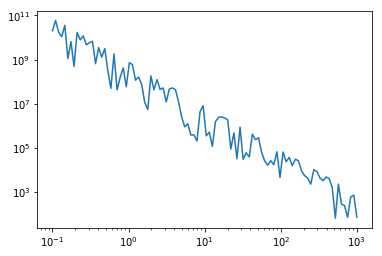

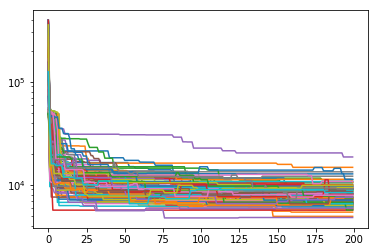

In [3]:
Potentials = np.loadtxt('resultTTlogspace-1_3_100.txt')
T = np.logspace(-1,3,100)
T = T[:len(Potentials)]

Var = np.var(Potentials,1)
SH = Var/T**2
plt.loglog(T,SH)

plt.figure()
for i in range(len(Potentials)):
    plt.semilogy(Potentials[i])

### Not resetting parameters after each cycle

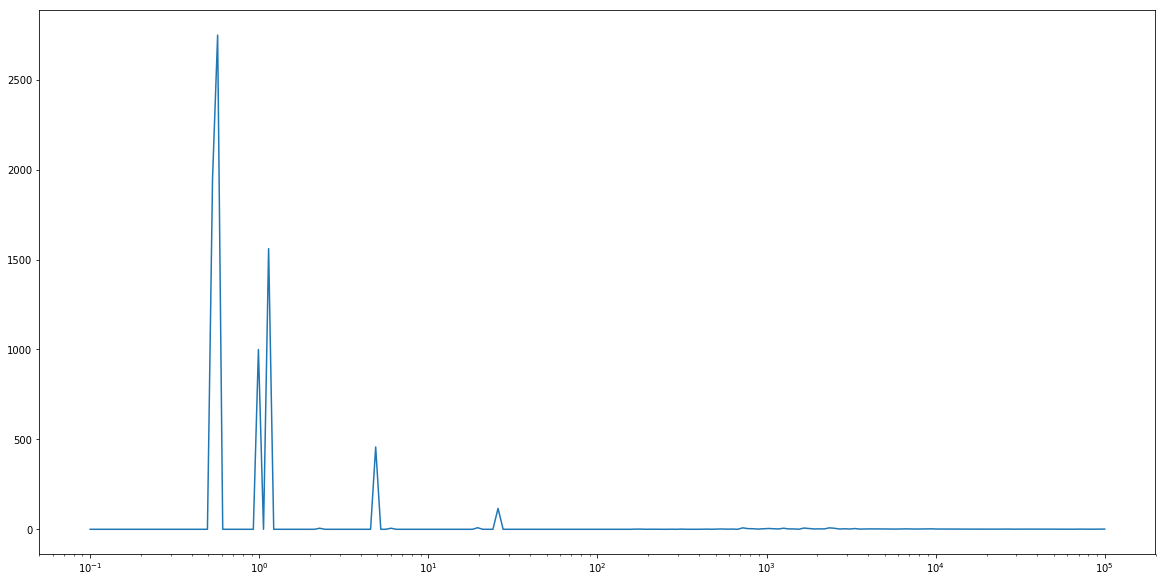

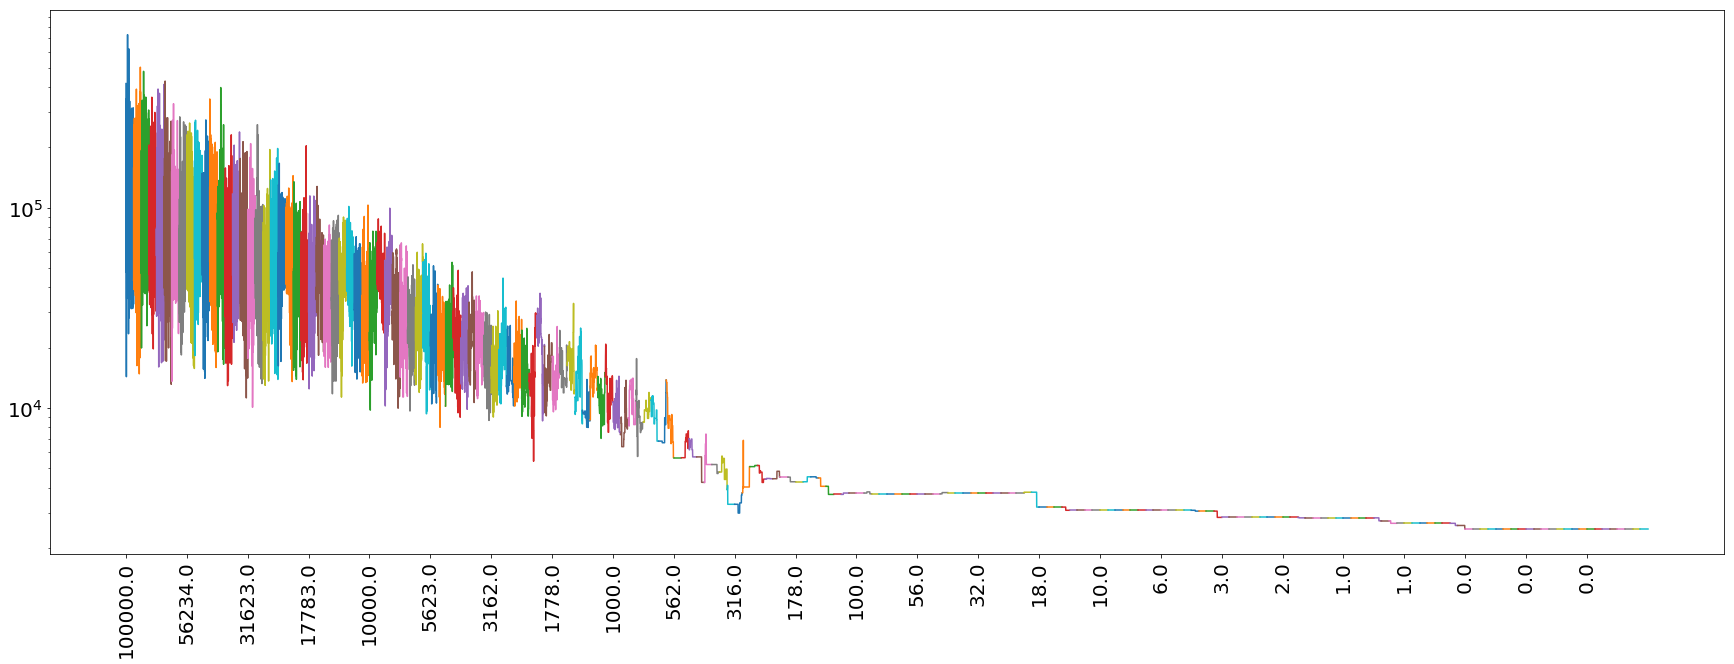

In [4]:
plt.figure(figsize=[20,10])
Potentials = np.loadtxt('resultTTlogspace5_-1_200.txt')
T = np.logspace(5,-1,200)
T = T[:len(Potentials)]

Var = np.var(Potentials,1)
SH = Var/T**2
plt.semilogx(T,SH)


plt.figure(figsize=[30,10])
for i in range(len(Potentials)):
    plt.semilogy(range(i*200,(i+1)*200),Potentials[i])
plt.yticks(fontsize=20)
plt.xticks(range(0,200*200,1600),np.round(np.logspace(5,-1,25)),fontsize=20,rotation='vertical');